# Random Forest
ensemble learning for decision tree  
reference: http://www.randpy.tokyo/entry/python_random_forest  

In [9]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.externals.six import StringIO
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pydotplus
from IPython.display import Image
from graphviz import Digraph

In [10]:
# datasets
data = pd.read_csv("../datasets/titanic/train.csv")
data['Fare'] = data["Fare"].fillna(data["Fare"].median())
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna("S")

data["Sex"] = data["Sex"].apply(lambda x: 1 if x == 'male' else 0)
data["Embarked"] = data["Embarked"].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

data = data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

xx_train = data.drop('Survived', axis=1)
yy_train = data.Survived
x_train , x_test, y_train, y_test = train_test_split(xx_train, yy_train, test_size=0.3)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


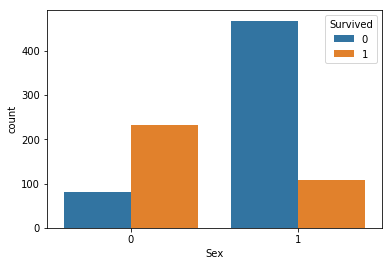

In [11]:
# visualize data
sns.countplot('Sex', hue='Survived', data=data)

In [12]:
# define model
ran_clf = RandomForestClassifier(random_state=0)
ran_clf.fit(x_train, y_train)
prediction = ran_clf.predict(x_test)

In [15]:
# accuracy
fpr, tpr, threshold = roc_curve(y_test, prediction, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(prediction, y_test))

0.7722786480748265
0.7873134328358209


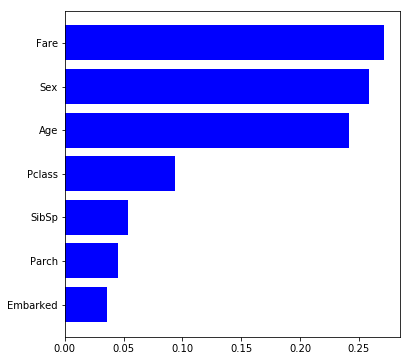

In [16]:
# visualize importance
features = x_train.columns
importnaces = ran_clf.feature_importances_
indices = np.argsort(importnaces)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importnaces[indices], color='blue')
plt.yticks(range(len(indices)), features[indices])
plt.show()